<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-библиотек" data-toc-modified-id="Загрузка-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка библиотек</a></span></li><li><span><a href="#Открытие-файла" data-toc-modified-id="Открытие-файла-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Открытие файла</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Ресемплирование" data-toc-modified-id="Ресемплирование-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Ресемплирование</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Тренды-и-сезонность" data-toc-modified-id="Тренды-и-сезонность-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Тренды и сезонность</a></span></li><li><span><a href="#Создание-признаков" data-toc-modified-id="Создание-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Создание признаков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#Константная-модель" data-toc-modified-id="Константная-модель-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Константная модель</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час и построить модель для такого предсказания.

## Подготовка

### Загрузка библиотек

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose

### Открытие файла

In [2]:
data = pd.read_csv('/datasets/taxi.csv', parse_dates=[0], index_col=[0])
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


### Изучение данных

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [4]:
data=data.sort_index()
print(data.index.is_monotonic)

True


В данных хранится информация за период с 2018-03-01 00:00:00 по 2018-08-31 23:50:00.

Дата и время данных расположены в хронологическом порядке.

### Ресемплирование

In [5]:
data = data.resample('1H').sum()
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


### Вывод

Мы получили датасет размером (26496, 2) с датами и числом заказов такси. 

В данных хранится информация за период с 2018-03-01 00:00:00 по 2018-08-31 23:50:00, дата и время расположены в хронологическом порядке.

После ресемплирования мы получили датасет размером (4416, 1).

## Анализ

### Тренды и сезонность

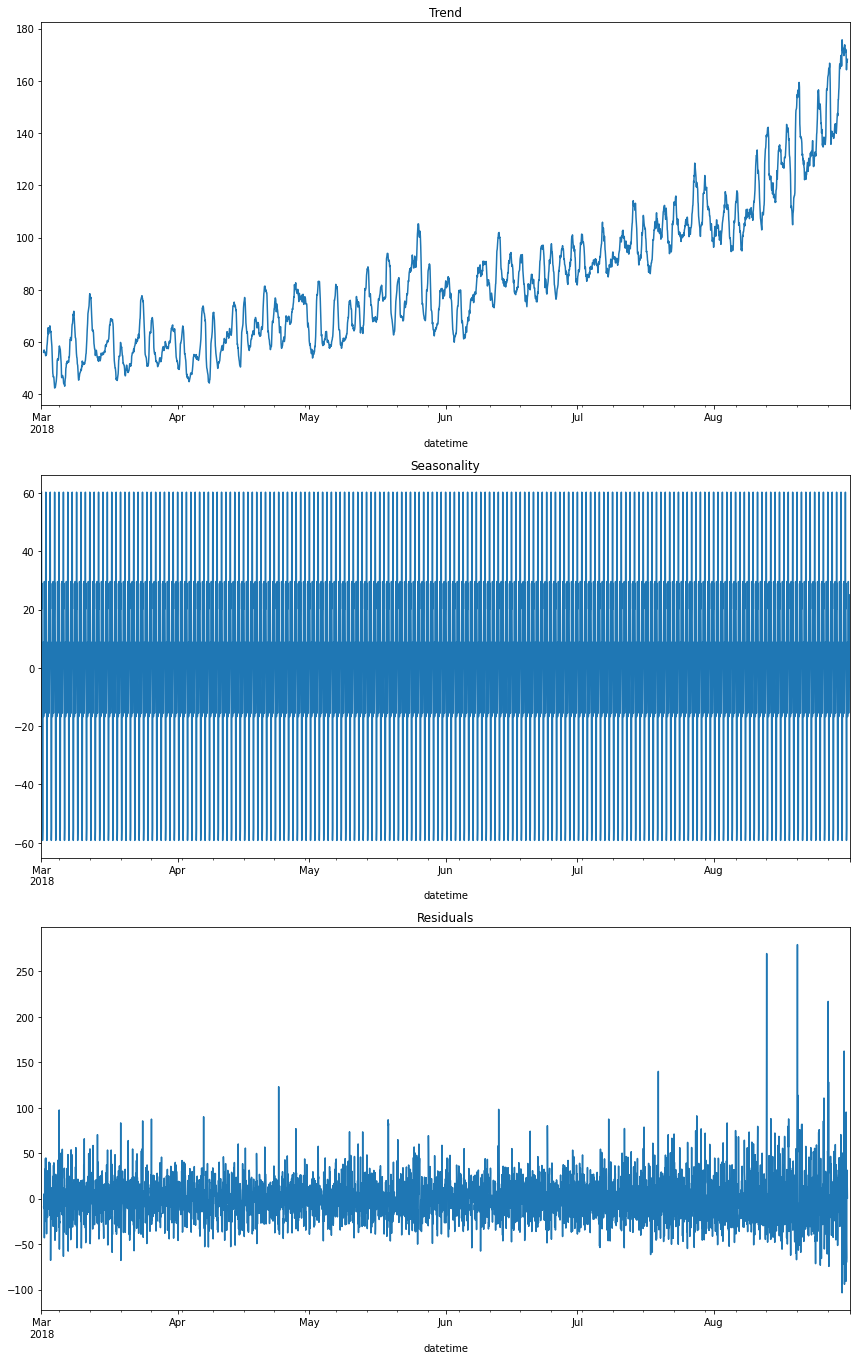

In [6]:
decomposed = seasonal_decompose(data)

plt.figure(figsize=(12, 19))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Residuals')
plt.tight_layout()

Тренд показывает, что количество заказов такси за рассморенный период растет.

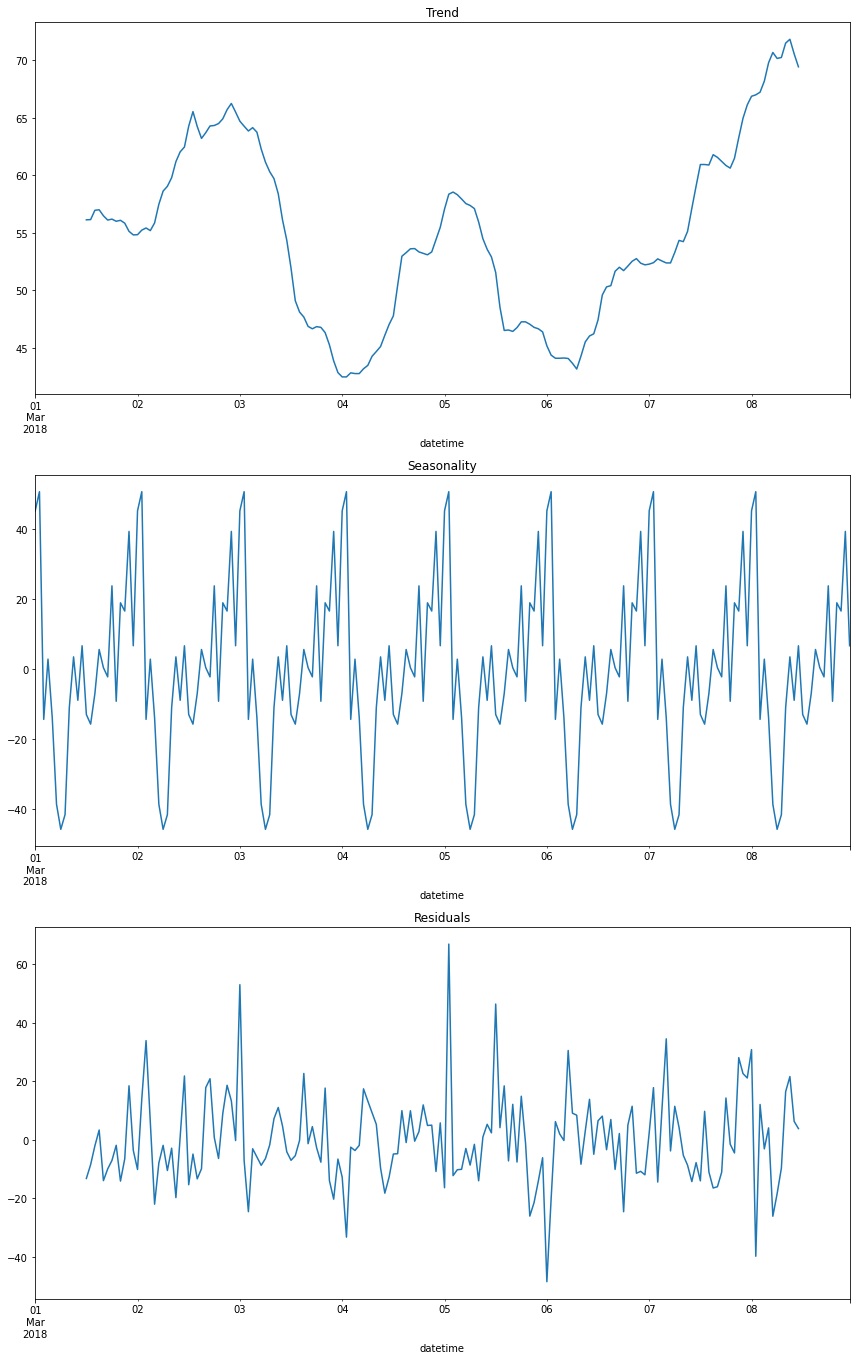

In [7]:
decomposed_week = seasonal_decompose(data['2018-03-01':'2018-03-08'])

plt.figure(figsize=(12, 19))
plt.subplot(311)
decomposed_week.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed_week.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality')
plt.subplot(313)
decomposed_week.resid.plot(ax=plt.gca()) 
plt.title('Residuals')
plt.tight_layout()

Сезонная составляющая показывает, что спрос на такси сильно зависит от времени суток. Самый большой спрос наблюдается вечером и ближе к полуночи, а самый низкий - с 5 до 7 утра.

### Создание признаков

In [8]:
data_for_model = data
data_for_model['rolling_mean'] = data_for_model.rolling(24).mean().shift()
data_for_model['mean'] = data_for_model['num_orders'].rolling(24).mean().shift()
data_for_model['std'] = data_for_model['num_orders'].rolling(24).std().shift()

data_for_model.head()

,num_orders,rolling_mean,mean,std
datetime,,,,
2018-03-01 00:00:00,124,NaN,NaN,NaN
2018-03-01 01:00:00,85,NaN,NaN,NaN
2018-03-01 02:00:00,71,NaN,NaN,NaN
2018-03-01 03:00:00,66,NaN,NaN,NaN
2018-03-01 04:00:00,43,NaN,NaN,NaN


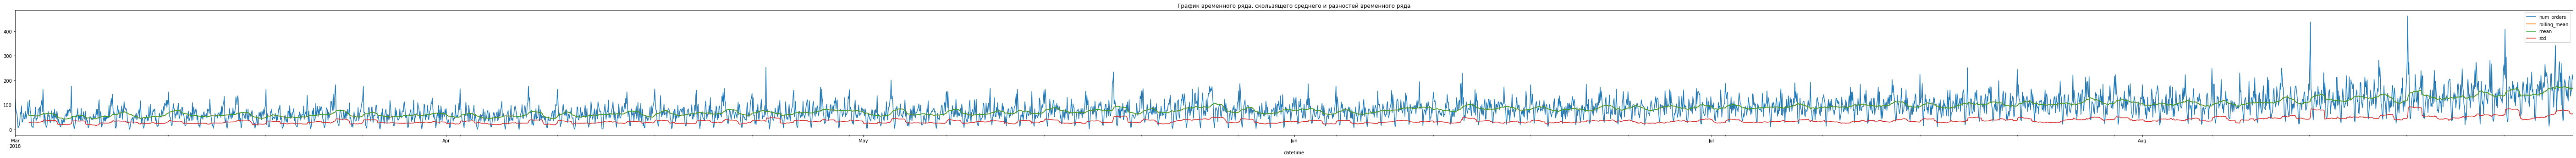

In [9]:
data_for_model.plot(figsize=(100,5))
plt.title('График временного ряда, скользящего среднего и разностей временного ряда');

In [10]:
data_for_model['dayofweek'] = data.index.dayofweek
data_for_model['day'] = data.index.day
data_for_model['month'] = data.index.month
data_for_model['lag_1'] = data['num_orders'].shift(1)
data_for_model['lag_2'] = data['num_orders'].shift(2)
data_for_model['lag_3'] = data['num_orders'].shift(3)
data_for_model['lag_4'] = data['num_orders'].shift(4)
data_for_model['lag_5'] = data['num_orders'].shift(5)
data_for_model['lag_6'] = data['num_orders'].shift(6)
data_for_model['lag_7'] = data['num_orders'].shift(7)
data_for_model['lag_8'] = data['num_orders'].shift(8)
data_for_model['lag_9'] = data['num_orders'].shift(9)
data_for_model['lag_10'] = data['num_orders'].shift(10)
data_for_model['lag_11'] = data['num_orders'].shift(11)
data_for_model['lag_12'] = data['num_orders'].shift(12)
data_for_model['lag_13'] = data['num_orders'].shift(13)
data_for_model['lag_14'] = data['num_orders'].shift(14)
data_for_model['lag_15'] = data['num_orders'].shift(15)
data_for_model['lag_16'] = data['num_orders'].shift(16)
data_for_model['lag_17'] = data['num_orders'].shift(17)
data_for_model['lag_18'] = data['num_orders'].shift(18)
data_for_model['lag_19'] = data['num_orders'].shift(19)
data_for_model['lag_20'] = data['num_orders'].shift(20)
data_for_model['lag_21'] = data['num_orders'].shift(21)
data_for_model['lag_22'] = data['num_orders'].shift(22)
data_for_model['lag_23'] = data['num_orders'].shift(23)
data_for_model['lag_24'] = data['num_orders'].shift(24)
data_for_model.head()

,num_orders,rolling_mean,mean,std,dayofweek,day,month,lag_1,lag_2,lag_3,...,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,NaN,NaN,NaN,3,1,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,NaN,NaN,NaN,3,1,3,124.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,NaN,NaN,NaN,3,1,3,85.0,124.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,NaN,NaN,NaN,3,1,3,71.0,85.0,124.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,NaN,NaN,NaN,3,1,3,66.0,71.0,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Вывод

Тренд показывает, что количество заказов такси за рассморенный период растет.

Сезонная составляющая показывает, что спрос на такси сильно зависит от времени суток. Самый большой спрос наблюдается вечером и ближе к полуночи, а самый низкий - с 5 до 7 утра.

Для обучения модели мы создали дополнительные колонки признаков: день недели, отстающие значения и скользаящее среднее.

## Обучение

In [11]:
train, not_train = train_test_split(data_for_model, shuffle=False, test_size=0.2)
valid, test = train_test_split(not_train, shuffle=False, test_size=0.5)

print(train.index.min(), train.index.max())
print(valid.index.min(), valid.index.max())
print(test.index.min(), test.index.max())

2018-03-01 00:00:00 2018-07-26 03:00:00
2018-07-26 04:00:00 2018-08-13 13:00:00
2018-08-13 14:00:00 2018-08-31 23:00:00


Данные разделились на выборки корректно и не перемешались.

In [12]:
train = train.dropna()

In [13]:
target_train = train['num_orders']
target_test = test['num_orders']
target_valid = valid['num_orders']
features_train = train.drop(['num_orders'],axis=1)
features_test = test.drop(['num_orders'],axis=1)
features_valid = valid.drop(['num_orders'],axis=1)

### Линейная регрессия

In [14]:
model = LinearRegression()

model.fit(features_train, target_train)
predictions = model.predict(features_valid)
print("RMSE линейной регрессии:", mean_squared_error(target_valid, predictions, squared=False))

RMSE линейной регрессии: 34.0664385946431


RMSE линейной регрессии: 34.06

### CatBoostRegressor

In [15]:
for iteration in range(90, 151, 10):
    model_cat = CatBoostRegressor(loss_function="RMSE", iterations=iteration, depth=10, verbose=10)
    model_cat.fit(features_train, target_train)
    predictions_cat = model_cat.predict(features_valid)
    rmse_cat = mean_squared_error(target_valid, predictions_cat, squared=False)
    print("RMSE, если iterations =", iteration, ":", rmse_cat)
    print()

Learning rate set to 0.35359
0:	learn: 30.9797114	total: 111ms	remaining: 9.92s
10:	learn: 18.1614591	total: 600ms	remaining: 4.31s
20:	learn: 15.1907329	total: 1.09s	remaining: 3.58s
30:	learn: 12.5239254	total: 1.62s	remaining: 3.08s
40:	learn: 10.5249691	total: 2.12s	remaining: 2.53s
50:	learn: 9.1066048	total: 2.62s	remaining: 2s
60:	learn: 7.7494240	total: 3.1s	remaining: 1.47s
70:	learn: 6.5985938	total: 3.59s	remaining: 962ms
80:	learn: 5.7701646	total: 4.08s	remaining: 453ms
89:	learn: 5.2078167	total: 4.51s	remaining: 0us
RMSE, если iterations = 90 : 34.834677544857016

Learning rate set to 0.324563
0:	learn: 31.3325687	total: 47.7ms	remaining: 4.72s
10:	learn: 18.7296901	total: 533ms	remaining: 4.31s
20:	learn: 15.9184203	total: 1.05s	remaining: 3.95s
30:	learn: 13.6170853	total: 1.54s	remaining: 3.42s
40:	learn: 11.9240402	total: 2.01s	remaining: 2.89s
50:	learn: 9.9585747	total: 2.51s	remaining: 2.41s
60:	learn: 8.6698970	total: 3.01s	remaining: 1.92s
70:	learn: 7.6858621	t

Минимальный RMSE (32.94) при количестве итераций 130.

In [16]:
for depth in range(4, 15, 2):
    model_cat = CatBoostRegressor(loss_function="RMSE", iterations=130, depth=depth, verbose=10)
    model_cat.fit(features_train, target_train)
    predictions_cat = model_cat.predict(features_valid)
    rmse_cat = mean_squared_error(target_valid, predictions_cat, squared=False)
    print("RMSE, если depth =", depth, ":", rmse_cat)
    print()

Learning rate set to 0.262218
0:	learn: 32.1867871	total: 2.52ms	remaining: 326ms
10:	learn: 23.6164571	total: 24.5ms	remaining: 265ms
20:	learn: 22.3359588	total: 47.3ms	remaining: 245ms
30:	learn: 21.5624119	total: 70.4ms	remaining: 225ms
40:	learn: 20.7243301	total: 92.8ms	remaining: 202ms
50:	learn: 20.0934585	total: 118ms	remaining: 183ms
60:	learn: 19.5415782	total: 142ms	remaining: 161ms
70:	learn: 18.9533366	total: 166ms	remaining: 138ms
80:	learn: 18.5021542	total: 187ms	remaining: 113ms
90:	learn: 18.1048567	total: 210ms	remaining: 90ms
100:	learn: 17.5570286	total: 232ms	remaining: 66.7ms
110:	learn: 17.1906516	total: 253ms	remaining: 43.4ms
120:	learn: 16.7294706	total: 277ms	remaining: 20.6ms
129:	learn: 16.4166972	total: 296ms	remaining: 0us
RMSE, если depth = 4 : 33.14917473618158

Learning rate set to 0.262218
0:	learn: 32.0870251	total: 6.33ms	remaining: 817ms
10:	learn: 22.6460771	total: 57.9ms	remaining: 627ms
20:	learn: 20.8519961	total: 108ms	remaining: 559ms
30:	l

Минимальный RMSE (32.60) при количестве итераций 130 и  глубине 8.

### LightGBM

In [17]:
parameters = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'max_depth': 8, 
    'learning_rate': 0.2,
    'verbose': 0
}

In [18]:
model_lgbm = LGBMRegressor(**parameters)
model_lgbm.fit(features_train, target_train)
predictions_lgbm = model_lgbm.predict(features_valid)
print("RMSE модели LightGBM:", mean_squared_error( target_valid,predictions_lgbm, squared=False))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000656 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

RMSE модели LightGBM: 33.95

### Константная модель

In [19]:
predictions_const = pd.Series(target_valid.mean(), index=target_test.index)
print("RMSE константной модели:", mean_squared_error(features_valid['lag_1'], predictions_const, squared=False))

RMSE константной модели: 45.94200969868951


MSE константной модели: 45.94

### Вывод

При обучении четырех моделей (линейная регрессия, CatBoostRegressor, LightGBM и константная модель), Минимальный RMSE (32.60) получен у CatBoostRegressor при количестве итераций 130 и  глубине 8.

На ней мы и проверим предсказания по тестовой выборке.

## Тестирование

In [20]:
train_cat, test_cat = train_test_split(data_for_model, shuffle=False, test_size=0.1)
target_train_cat = train_cat['num_orders']
features_train_cat = train_cat.drop(['num_orders'],axis=1)
target_test_cat = test_cat['num_orders']
features_test_cat = test_cat.drop(['num_orders'],axis=1)

In [21]:
model_cat = CatBoostRegressor(iterations=130, depth=8, verbose=10)
model_cat.fit(features_train_cat, target_train_cat)
predictions_cat = model_cat.predict(features_test_cat)
print("RMSE CatBoostRegressor на тестовой выборке:", mean_squared_error(target_test_cat, predictions_cat, squared=False))

Learning rate set to 0.267437
0:	learn: 34.0730615	total: 30.2ms	remaining: 3.9s
10:	learn: 23.0018136	total: 219ms	remaining: 2.37s
20:	learn: 20.9791504	total: 405ms	remaining: 2.1s
30:	learn: 19.5616040	total: 595ms	remaining: 1.9s
40:	learn: 18.1673615	total: 779ms	remaining: 1.69s
50:	learn: 16.4560159	total: 963ms	remaining: 1.49s
60:	learn: 14.9759107	total: 1.15s	remaining: 1.3s
70:	learn: 13.8941805	total: 1.34s	remaining: 1.11s
80:	learn: 12.8792377	total: 1.52s	remaining: 918ms
90:	learn: 11.9180585	total: 1.71s	remaining: 734ms
100:	learn: 11.1007863	total: 1.91s	remaining: 548ms
110:	learn: 10.5016192	total: 2.1s	remaining: 360ms
120:	learn: 9.8647618	total: 2.3s	remaining: 171ms
129:	learn: 9.3239892	total: 2.48s	remaining: 0us
RMSE CatBoostRegressor на тестовой выборке: 43.87486366850482


RMSE CatBoostRegressor на тестовой выборке: 43.87

## Общий вывод

Датасет размером (26496, 2) содержит информацию о времени и количестве заказов такси. 

Предоставлена информация за период с 2018-03-01 00:00:00 по 2018-08-31 23:50:00, дата и время расположены в хронологическом порядке.

После ресемплирования мы получили датасет размером (4416, 1).

Тренд показал, что количество заказов такси за рассморенный период растет.

Сезонная составляющая показала, что спрос на такси сильно зависит от времени суток. Самый большой спрос наблюдается вечером и ближе к полуночи, а самый низкий - с 5 до 7 утра.

Для обучения модели мы создали дополнительные колонки признаков: день недели, отстающие значения и скользаящее среднее.

При обучении четырех моделей (линейная регрессия, CatBoostRegressor, LightGBM и константная модель), Минимальный RMSE (32.60) получен у CatBoostRegressor при количестве итераций 130 и  глубине 8.

RMSE CatBoostRegressor на тестовой выборке: 43.87

Задача прогнозирования временного ряда выполнена, нам удалось построить модель, которая по историческим данным предскажет будущие значения временного ряда.